In [621]:
#from IPython import get_ipython
#get_ipython().magic('reset -sf') 

In [2]:
%who_ls

[]

# DESAFIO MODELO PROPERATTI

In [1]:
import Util as utl
import pandas as pd
import numpy as np

/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#data = pd.read_csv('/home/DS-DH/notebooks/digitalHouse/properatti.csv')

In [3]:
#data = utl.limpiarDatos(data,0.055)

/home/DS-DH/notebooks/digitalHouse/modelo-properatti/ipynb/Util.py:368: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.ambientesImputados = ImputarAmbientesProceso(data,10)


In [2]:
data = pd.read_csv('/home/DS-DH/notebooks/digitalHouse/data.csv',sep='|')
#data.to_csv('/home/DS-DH/notebooks/digitalHouse/data.csv',sep='|')

In [3]:
matriz = utl.GenerarMatriz(data)

In [4]:
modeloMatriz = utl.generarDummies(matriz)

In [30]:
#modeloMatriz.shape

(30917, 76)

In [8]:
modeloMatriz=modeloMatriz[(modeloMatriz.superficie_total>20) & (modeloMatriz.superficie_total<900)]
modeloMatriz=modeloMatriz[(modeloMatriz.precio_m2>20) & (modeloMatriz.precio_m2<8000)]

# Regresion Lineal Multiple

/home/DS-DH/notebooks/digitalHouse/modelo-properatti/ipynb/Util.py:99: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  xs = xs.as_matrix()
/home/DS-DH/notebooks/digitalHouse/modelo-properatti/ipynb/Util.py:101: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  y = y.as_matrix()


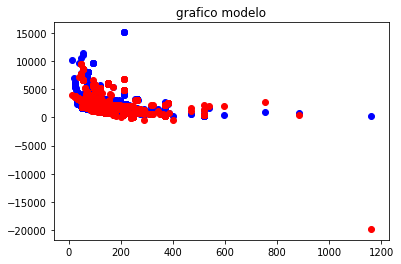

CROSS VALIDATION: 0.8886573350918217 0.8753068656334284 0.8953321739613548 0.9156477152933428 0.9016816626539522
MAE: 204.02924197659974
MSE: 320401.24789399677
RMSE: 566.0399702264821
EL R2 TRAIN ES DE:  0.89688464880198
EL R2 TEST ES DE:  0.8615507707633846


In [5]:
modelo = utl.modelo_regresion_lineal(modeloMatriz)

#  Ridge Regression

/home/DS-DH/notebooks/digitalHouse/modelo-properatti/ipynb/Util.py:59: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  xs = xs.as_matrix()
/home/DS-DH/notebooks/digitalHouse/modelo-properatti/ipynb/Util.py:60: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  y = y.as_matrix()


REGULARIZACION CON RIDGE
CROSS VALIDATION: 0.878761204814513 0.8754147827456625 0.8994082550704838 0.9007822015417697 0.8444003027103615
MAE RIDGE: 216.97843437217156
MSE RIDGE: 230953.66951729046
RMSE RIDGE: 480.5763930087395
RIDGE -> R2 TRAIN:  0.8818384960681905
RIDGE -> R2 TEST:  0.8971416403993657


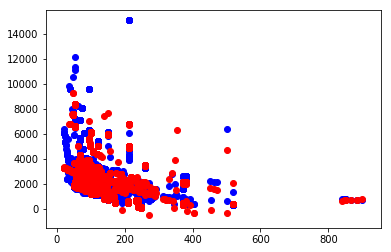

In [6]:
modelo_ridge = utl.modelo_ridge_cross_validation(modeloMatriz)

In [9]:
(modelo_ridge.intercept_,modelo_ridge.coef_)

(5480.5978101829005,
 array([-1.24138992e+01, -4.32212816e+01,  3.23360190e+00, -3.81293531e+00,
         1.16893400e+01, -1.68783604e+01, -5.26908358e+01, -6.11279081e+01,
        -8.80695040e+01, -8.04471988e+01, -5.20226031e+01,  8.77175771e+01,
        -1.63867503e+03, -1.69161148e+03, -1.36786851e+03, -1.28415962e+03,
         2.27260681e+02, -4.06817542e+02,  6.66244951e+02, -9.70814396e+02,
         3.44866677e+03,  9.12344907e+02, -8.12763721e+02, -7.02170985e+02,
         1.12510833e+03, -2.52234411e+02, -7.68822981e+02,  2.12667924e+02,
        -6.50111136e+02, -3.63203166e+02,  2.58443288e+02, -9.71482119e+02,
         9.04179164e+02, -8.12586503e+02, -7.34863716e+02,  3.91000851e+03,
        -1.32163369e+03, -9.16705712e+02, -1.20143020e+03, -4.20267892e+02,
        -1.24067645e+03, -2.60797716e+03, -1.30204330e+03, -1.18286964e+03,
        -5.28690760e+02, -9.89404563e+02, -3.88773296e+02,  2.84515852e+03,
        -7.02977863e+02, -8.10815693e+02, -1.14033864e+03, -1.03507

# Lasso Regression

/home/DS-DH/notebooks/digitalHouse/modelo-properatti/ipynb/Util.py:23: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  xs = xs.as_matrix()
/home/DS-DH/notebooks/digitalHouse/modelo-properatti/ipynb/Util.py:24: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  y = y.as_matrix()


LASSO REGRESSION
CROSS VALIDATION: 0.8754515607996983 0.8860164282995943 0.9037671525767048 0.8857539167546796 0.8903989438164658
MAE LASSO: 209.64865047942007
MSE LASSO: 249267.2229376732
RMSE LASSO: 499.26668518705833
LASSO -> R2 TRAIN:  0.8936141626917302
LASSO -> R2 TEST:  0.8906213270338014


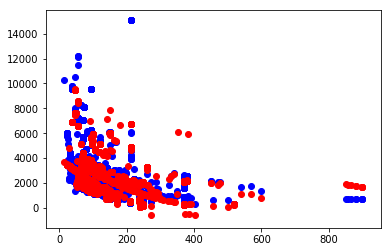

In [7]:
modelo_lasso = utl.modelo_lasso_cross_validation(modeloMatriz)

In [8]:
(modelo_lasso.intercept_,modelo_lasso.coef_)

(5479.715267200303,
 array([-2.06584344e+01, -0.00000000e+00, -2.83333615e+01, -1.33651457e+02,
         5.32198906e+00, -1.47031050e+01, -4.65049895e+01, -3.79687244e+01,
        -2.40059882e+00,  6.28545815e+01, -1.82928140e+02,  6.14034447e+01,
        -1.74490023e+03, -1.82480295e+03, -4.06193335e+02, -6.37667635e+02,
         1.06528775e+03, -5.88119190e+02,  1.42345759e+03, -2.05401928e+02,
         3.99408247e+03,  1.66984384e+03, -1.60292730e+02, -0.00000000e+00,
         1.82453214e+03,  2.75084209e+02, -1.03012423e+02,  9.80802634e+02,
         4.19926483e+00, -3.69399323e+02,  1.07583737e+03, -1.39680174e+02,
         1.74845028e+03, -1.35015082e+02, -1.37421268e+02,  4.89123686e+03,
        -7.80402606e+02, -2.07797877e+02, -1.05261498e+03,  1.62791819e+02,
        -3.09293885e+02, -1.85209756e+03, -3.38253782e+02, -4.87521090e+02,
         4.13883592e+02, -0.00000000e+00,  1.05541124e+02,  3.06058358e+03,
        -9.57484936e+01, -2.54843170e+01, -5.29862731e+02,  1.447585

## PARAMETROS A PREDECIR
###### PARA LA PREDICCION DE PRECIOS POR M2 DE ALQUILERES EN CAPITAL FEDERAL

In [17]:
SUPERFICIE_TOTAL = 220           ##  [0,600]
JARDIN = '0'                      ##  0,1
TERRAZA = '1'                     ##  0,1
CANTIDAD_DE_AMBIENTES = '3'       ##  1,2,3,4,4,5,6,7
TIPO_DE_PROPIEDAD = 'CASA'        ##  CASA, PH, DTO
BARRIO = 'flores'               ##  barrios de CABA, en minusculas

nuevos_Feactures = utl.nuevosDatos(modeloMatriz, SUPERFICIE_TOTAL, JARDIN, TERRAZA, CANTIDAD_DE_AMBIENTES, TIPO_DE_PROPIEDAD, BARRIO)
y_predict = modelo_ridge.predict(nuevos_Feactures)

'EL RESULTADO DEL MODELO PARA LAS VARIABLES INGRESADAS ES DE {} U$D POR M2'.format(y_predict[0].astype(int))


/home/DS-DH/notebooks/digitalHouse/modelo-properatti/ipynb/Util.py:285: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  predecir_data.superficie_total_2 = predecir_data.superficie_total**2


'EL RESULTADO DEL MODELO PARA LAS VARIABLES INGRESADAS ES DE 1816 U$D POR M2'

## LIMPIEZA DE OUTLIERS 

In [16]:
data_original = pd.read_csv('/home/DS-DH/notebooks/digitalHouse/properatti.csv')

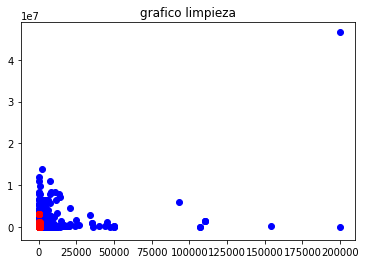

In [17]:
import matplotlib.pyplot as plt

#GENERO EJE X -> SUPERFICIE TOTAL
x1 = data_original.surface_total_in_m2

#GENERO EJE Y -> PRECIO M2 DE TEST
x2 = data_original.price_aprox_usd

# EJE Y -> PRECIO M2 PREDICHO
x3 = modeloMatriz.superficie_total

x4 = modeloMatriz.precio_m2*modeloMatriz.superficie_total

#PLOT
plt.scatter(x1,x2,label='original', color='blue')
plt.scatter(x3,x4,label='limpiado', color='red')
plt.title('grafico limpieza')
plt.show()

## DESCENSO GRADIENTE 

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, preprocessing

In [ ]:
for x in xs:
    print (x.applymap(lambda x: x+1))

In [ ]:
mean = np.mean(xs)
std = np.std(xs)

In [47]:
xs = [(x - mean) / std for x in xs]

In [50]:
mean = np.mean(y)
std = np.std(y)
y = [(y - mean) / std for y in y]

# REGRESION MULTIPLE

In [63]:
%matplotlib inline

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = 10, 10

import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [57]:
xs = modeloMatriz.iloc[:,1:]
y = modeloMatriz.iloc[:,0]

In [58]:
X_train, X_test, y_train, y_test = train_test_split(xs, y, test_size=0.4)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(xs, y, test_size=0.4)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(18275, 72) (18275,)
(12184, 72) (12184,)


In [67]:
al_ridge = np.linspace(0.001, 0.3, 300)
#al_lasso = np.linspace(0.1, 0.5, 300)
kf = KFold(n_splits=5, shuffle=True, random_state=12)

In [68]:
#lm = LinearRegression(normalize=True)
lm_ridge_cv= RidgeCV(alphas=al_ridge, cv=kf, normalize=True)
#lm_lasso_cv = LassoCV(alphas=al_lasso, cv=kf, normalize=True)

In [69]:
# Hacemos los fits respectivos
#lm.fit(X_train, y_train)
lm_ridge_cv.fit(X_train, y_train)
#lm_lasso_cv.fit(X_train, y_train)

RidgeCV(alphas=array([0.001, 0.002, ..., 0.299, 0.3  ]),
    cv=KFold(n_splits=5, random_state=12, shuffle=True),
    fit_intercept=True, gcv_mode=None, normalize=True, scoring=None,
    store_cv_values=False)

In [70]:
print('Alpha Ridge:',lm_ridge_cv.alpha_,'\n')
      #'Alpha LASSO:',lm_lasso_cv.alpha_,'\n')

Alpha Ridge: 0.002 



In [75]:
# Calculamos el R2

print(#" Score Train Lineal: %.2f\n" % lm.score(X_train, y_train),
      " Score Train Ridge : %.2f\n" % lm_ridge_cv.score(X_train, y_train))
      #" Score Train Lasso : %.2f\n" %  lm_lasso_cv.score(X_train, y_train))


 Score Train Lineal: 0.78
  Score Train Ridge : 0.78
  Score Train Lasso : 0.77



In [81]:
import matplotlib.pyplot as plt

#GENERO EJE X -> SUPERFICIE TOTAL
x1 = X_test[:,0]

#GENERO EJE Y PARA TESTING DE RL
#x2 = lm.predict(y_train)

#GENERO EJE Y -> PRECIO M2 DE TEST
x3 = lm_ridge_cv.predict(y_test)

# EJE Y -> PRECIO M2 PREDICHO
x4 = lm_lasso_cv.predict(y_test)


#PLOT
plt.scatter(x1,x2,label='lineal multiple', color='blue')
plt.scatter(x1,x3,label='ridge', color='red')
plt.scatter(x1,x4,label='lasso', color='yellow')
plt.title('grafico comparacion regresiones lineal')
plt.show()

ValueError: Expected 2D array, got 1D array instead:
array=[2954.58500315 3057.32484076 2397.43589744 ... 3262.36994216 2100.97416974
 2092.12164101].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.